In [120]:
%load_ext autoreload
%autoreload 2

# DATA MANIPULATION
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# VIEWING OPTIONS IN THE NOTEBOOK
from sklearn import set_config
set_config(display='diagram')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
from tensorflow.keras.utils import to_categorical

data = pd.read_csv('../data/data_for_model_legs.csv')

data.head()
X = data[['trip','mean_delay','weekday','sin_time','cos_time','sin_day','cos_day','public_holiday','covid_lockdown','temp_max_combined', 'temp_min_combined','prcp_max_combined', 'snow_max_combined', 'wspd_max_combined','wpgt_max_combined', 'coco_max_combined']]
X = X[0:-1] # there is an issue with a null yas the last entry, we have to remove that one, therefore also the corresponding X
y = data['target_good_bad'] 
y = y[0:-1]
y=y.astype('int') # important as otherwise it gets attributed "object" type, which is bad for models




In [123]:
data.head(50)

,Unnamed: 0,zugnr,trip,city,bhf,origin_city,destination_city,date,datum,sharp_date,weekday,weekend,month,time_of_day,sin_time,cos_time,sin_day,cos_day,arrTime_clean,adelay,target,target_binary,target_numeric,target_good_bad,temp_oc_6,prcp_oc_6,snow_oc_6,wspd_oc_6,wpgt_oc_6,coco_oc_6,temp_dc_6,prcp_dc_6,snow_dc_6,wspd_dc_6,wpgt_dc_6,coco_dc_6,temp_oc_12,prcp_oc_12,snow_oc_12,wspd_oc_12,wpgt_oc_12,coco_oc_12,temp_dc_12,prcp_dc_12,snow_dc_12,wspd_dc_12,wpgt_dc_12,coco_dc_12,temp_max_combined,prcp_max_combined,snow_max_combined,wspd_max_combined,wpgt_max_combined,coco_max_combined,temp_min_combined,covid_lockdown,public_holiday,mean_delay,median_delay
0,0,ICE 830,Berlin-Hannover,Hannover,Hannover Hbf,Berlin,Hannover,2019-12-29 23:22:00,2019-12-29,2019-12-29 23:00:00,Sunday,True,December,evening,-0.165048,0.986286,-0.051479,0.998674,2322,0,on time,1,0,True,-0.3,0.0,0.0,13.0,22.2,2.0,1.6,0.0,0.0,5.0,17.0,2.0,-0.3,0.0,0.0,13.0,22.2,2.0,1.6,0.0,0.0,5.0,17.0,2.0,1.6,0.0,0.0,13.0,22.2,2.0,-0.3,False,False,7.991597,0.0
1,1,ICE 830,Berlin-Hannover,Hannover,Hannover Hbf,Berlin,Hannover,2020-01-01 23:22:00,2020-01-01,2020-01-01 23:00:00,Wednesday,False,January,evening,-0.165048,0.986286,0.017166,0.999853,2322,0,on time,1,0,True,-1.1,0.0,0.0,9.3,16.7,1.0,-2.7,0.0,0.0,4.0,4.0,1.0,-1.1,0.0,0.0,9.3,16.7,1.0,-2.7,0.0,0.0,4.0,4.0,1.0,-1.1,0.0,0.0,9.3,16.7,1.0,-2.7,False,True,7.991597,0.0
2,2,ICE 830,Berlin-Hannover,Hannover,Hannover Hbf,Berlin,Hannover,2020-01-05 23:45:00,2020-01-05,2020-01-06 00:00:00,Sunday,True,January,evening,-0.065403,0.997859,0.085731,0.996318,2345,0,on time,1,0,True,2.7,0.0,0.0,13.0,22.2,2.0,5.2,0.0,0.0,8.3,20.0,2.0,2.7,0.0,0.0,13.0,22.2,2.0,5.2,0.0,0.0,8.3,20.0,2.0,5.2,0.0,0.0,13.0,22.2,2.0,2.7,False,False,7.991597,0.0
3,3,ICE 830,Berlin-Hannover,Hannover,Hannover Hbf,Berlin,Hannover,2020-01-12 23:22:00,2020-01-12,2020-01-12 23:00:00,Sunday,True,January,evening,-0.165048,0.986286,0.204552,0.978856,2322,0,on time,1,0,True,6.3,0.0,0.0,22.2,42.6,2.0,7.3,0.0,0.0,15.1,52.0,1.0,6.3,0.0,0.0,22.2,42.6,2.0,7.3,0.0,0.0,15.1,52.0,1.0,7.3,0.0,0.0,22.2,52.0,2.0,6.3,False,False,7.991597,0.0
4,4,ICE 830,Berlin-Hannover,Hannover,Hannover Hbf,Berlin,Hannover,2020-01-19 23:22:00,2020-01-19,2020-01-19 23:00:00,Sunday,True,January,evening,-0.165048,0.986286,0.320423,0.947274,2322,0,on time,1,0,True,1.9,0.0,0.0,9.3,16.7,2.0,-2.8,0.0,0.0,6.1,11.0,3.0,1.9,0.0,0.0,9.3,16.7,2.0,-2.8,0.0,0.0,6.1,11.0,3.0,1.9,0.0,0.0,9.3,16.7,3.0,-2.8,False,False,7.991597,0.0
5,5,ICE 830,Berlin-Hannover,Hannover,Hannover Hbf,Berlin,Hannover,2020-01-26 23:22:00,2020-01-26,2020-01-26 23:00:00,Sunday,True,January,evening,-0.165048,0.986286,0.431673,0.902030,2322,0,on time,1,0,True,1.7,0.0,0.0,11.1,18.5,2.0,1.9,0.0,0.0,5.0,21.0,2.0,1.7,0.0,0.0,11.1,18.5,2.0,1.9,0.0,0.0,5.0,21.0,2.0,1.9,0.0,0.0,11.1,21.0,2.0,1.7,False,False,7.991597,0.0
6,6,ICE 830,Berlin-Hannover,Hannover,Hannover Hbf,Berlin,Hannover,2020-02-02 23:22:00,2020-02-02,2020-02-02 23:00:00,Sunday,True,February,evening,-0.165048,0.986286,0.536696,0.843776,2322,0,on time,1,0,True,5.4,0.4,0.0,13.0,22.2,2.0,4.7,0.1,0.0,26.6,44.0,2.0,5.4,0.4,0.0,13.0,22.2,2.0,4.7,0.1,0.0,26.6,44.0,2.0,5.4,0.4,0.0,26.6,44.0,2.0,4.7,False,False,7.991597,0.0
7,7,ICE 830,Berlin-Hannover,Hannover,Hannover Hbf,Berlin,Hannover,2020-02-09 23:22:00,2020-02-09,2020-02-09 23:00:00,Sunday,True,February,evening,-0.165048,0.986286,0.633978,0.773351,2322,0,on time,1,0,True,11.4,0.6,0.0,35.2,77.8,2.0,7.5,0.0,0.0,47.2,82.0,4.0,11.4,0.6,0.0,35.2,77.8,2.0,7.5,0.0,0.0,47.2,82.0,4.0,11.4,0.6,0.0,47.2,82.0,4.0,7.5,False,False,7.991597,0.0
8,8,ICE 830,Berlin-Hannover,Hannover,Hannover Hbf,Berlin,Hannover,2020-02-16 23:22:00,2020-02-16,2020-02-16 23:00:00,Sunday,True,February,evening,-0.165048,0.986286,0.722117,0.691771,2322,0,on time,1,0,True,12.8,0.0,0.0,31.5,63.0,2.0,8.8,0.0,0.0,37.8,59.0,2.0,12.8,0.0,0.0,31.5,63.0,2.0,8.8,0.0,0.0,37.8,59.0,2.0,12.8,0.0,0.0,37.8,63.0,2.0,8.8,False,False,7.991597,0.0
9,9,ICE 830,Berlin-Hannover,Hannover,Hannover Hbf,B

In [17]:
X.dtypes

trip                  object
mean_delay           float64
weekday               object
sin_time             float64
cos_time             float64
sin_day              float64
cos_day              float64
public_holiday          bool
covid_lockdown          bool
temp_max_combined    float64
temp_min_combined    float64
prcp_max_combined    float64
snow_max_combined    float64
wspd_max_combined    float64
wpgt_max_combined    float64
coco_max_combined    float64
dtype: object

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

def create_preproc_ordinal():
    feat_ordinal_dict = {
        # considers "missing" as the worse category
        "coco_max_combined": [1, 2, 3, 4]
    }

    feat_ordinal = sorted(feat_ordinal_dict.keys())
    feat_ordinal_values_sorted = [feat_ordinal_dict[i] for i in feat_ordinal]

    encoder_ordinal = OrdinalEncoder(
        categories=feat_ordinal_values_sorted,
        handle_unknown="use_encoded_value",
        unknown_value=-1  # Considers unknown values as worse than "missing"
    )

    preproc_ordinal = make_pipeline(
        SimpleImputer(strategy="constant", fill_value=1),
        encoder_ordinal,
        MinMaxScaler()
    )

    return preproc_ordinal, feat_ordinal


def create_preproc_numerical():
    return make_pipeline(
        KNNImputer(),
        MinMaxScaler()
    )

def create_preproc_nominal():
    return make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore")
    )

In [20]:
def create_preproc(X, percentile = 75):
    """Create an (unfitted) sklearn preprocessing pipeline well suited for the Houses Kaggle Competition

    Args:
        X (pandas.DataFrame): Feature matrix
        percentile (float): Percentage of feature to keep after one hot encoding

    Returns:
        sklearn.pipeline.Pipeline: un-fitted preprocessor
    """
    preproc_ordinal, feat_ordinal = create_preproc_ordinal()
    
    preproc_numerical = create_preproc_numerical()
    feat_numerical = sorted(X.select_dtypes(
        include=["float64"]).columns)
    
    preproc_nominal = create_preproc_nominal()
    feat_nominal = sorted(
        list(set(X.columns) - set(feat_numerical) - set(feat_ordinal)))
    
    feature_transformer = ColumnTransformer(
        [
        ("numerical_encoder", preproc_numerical, feat_numerical),
        ("ordinal_encoder", preproc_ordinal, feat_ordinal),
        ("nominal_encoder", preproc_nominal, feat_nominal)
        ],
        remainder="drop")

    feature_selector = SelectPercentile(
        mutual_info_regression,
        percentile=percentile,  # keep the xx% most important features
    )

    preproc = make_pipeline(
        feature_transformer,
        feature_selector
    )
    return preproc

In [21]:
preproc = create_preproc(X_train)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['coco_max_combined',
                                                   'cos_day', 'cos_time',
                                                   'mean_delay',
                                                   'prcp_max_combined',
                                                   'sin_day', 'sin_time',
                                                   'snow_max_combined',
                                                   'temp_max_combined',
                                                   'temp_min_combined',
                                                   'wpgt_max_combined',
                                                   'wspd_...
                                                                   MinMaxScaler())]),
                                                  ['coco_max_combined']),
                                                 ('nominal_encoder',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['covid_lockdown',
                                                   'public_holiday', 'trip',
                                                   'weekday'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x7f06d1b31e50>))])

In [22]:
# Fit the preprocessor on the train set
preproc.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['coco_max_combined',
                                                   'cos_day', 'cos_time',
                                                   'mean_delay',
                                                   'prcp_max_combined',
                                                   'sin_day', 'sin_time',
                                                   'snow_max_combined',
                                                   'temp_max_combined',
                                                   'temp_min_combined',
                                                   'wpgt_max_combined',
                                                   'wspd_...
                                                                   MinMaxScaler())]),
                                                  ['coco_max_combined']),
                                                 ('nominal_encoder',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['covid_lockdown',
                                                   'public_holiday', 'trip',
                                                   'weekday'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x7f06d1b31e50>))])

In [23]:
# Create the preprocessed versions of X_train and X_val
X_train_preproc = preproc.transform(X_train)
X_val_preproc = preproc.transform(X_val)

# Let's also already create the preprocessed version of X_test for our future predictions
X_test_preproc = preproc.transform(X_test)

In [24]:
# Shapes before preprocessing
X_train.shape, X_val.shape #X_test.shape

((150030, 16), (30006, 16))

In [25]:
# Shapes after preprocessing
X_train_preproc.shape, X_val_preproc.shape #,X_test_preproc.shape

((150030, 47), (30006, 47))

# Logistic regression

### Grid Search to find parameters such as target balancing

In [77]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, cross_validate

# define weight hyperparameter - important for target balancing
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]

hyperparam_grid = {"class_weight": w }

log_reg = LogisticRegression(max_iter=10000) 

grid = GridSearchCV(log_reg,hyperparam_grid,scoring="accuracy", cv=5, n_jobs=-1, refit=True)
grid.fit(X_train_preproc,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')




Best score: 0.6660801173098714 with param: {'class_weight': {0: 1.0, 1: 1.0}}


### Regular logistic regression with cross validation

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

# define model
lg3 = LogisticRegression(random_state=1, class_weight={0: 1, 1: 1},max_iter=10000) # use best hyperparams from grid search here
# fit it
lg3.fit(X_train_preproc,y_train)
# test
y_pred = lg3.predict(X_test_preproc)
# performance
#print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred,normalize='all')}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')

Accuracy Score: 0.6616845788552862
Area Under Curve: 0.5487250422382742
Recall score: 0.9246617466174661
Precision score: 0.6751234845083072


In [ ]:
# Save a model.joblib file based on this model
from sklearn.pipeline import Pipeline
import joblib

pipeline = Pipeline([
      ('pipeline', create_preproc(X_train)),
      ('model', lg3)
    ])
pipeline.fit(X_train, y_train)

joblib.dump(pipeline, 'model.joblib')

In [ ]:
# Load and make predictinos as we would in the API 
model_api = joblib.load('model.joblib')
print(model_api.predict(X_test)) # X_test here is in the same format as preprocessed data, pipeline is included in the model
print(model_api.predict_proba(X_test))

In [ ]:
X_test

In [ ]:

cv_results = cross_validate(log_reg, X_train_preproc, y_train, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )

log_reg.fit(X_test_preproc,y_test)
cv_results = pd.DataFrame(cv_results)
r2 = cv_results['test_r2'].mean()
max_error = cv_results['test_max_error'].max()

In [ ]:
r2

-0.5406702234981353

# KNN Classifier

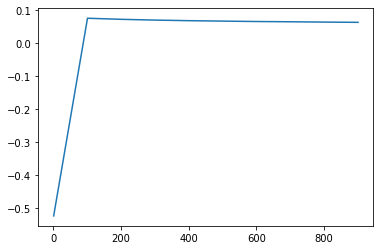

In [21]:
# Run a search with cross_validate to find the optimal
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

k_range = range(1,1000,100) # Totally arbitrary, but previous testing suggests it's best to use at least 180

scores = []

# We append the scores in the dictionary
for k in k_range:
    neigh = KNeighborsRegressor(n_neighbors=k)
    cv_results = cross_validate(neigh, X_train_preproc, y_train, cv=3, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
    cv_results = pd.DataFrame(cv_results)
    scores.append(cv_results['test_r2'].mean())
       
plt.plot(k_range, scores, label = 'Training score')
#plt.plot(scores_, test_scores_mean, label = 'Test score')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


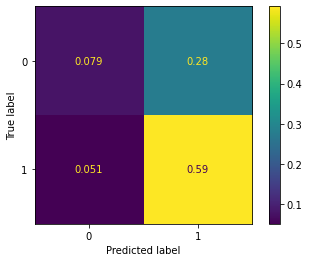

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict

neigh = KNeighborsClassifier(n_neighbors=200)
neigh.fit(X_train_preproc,y_train)
#y_pred = cross_val_predict(model,X_val_preproc,y_val,cv=5,method='predict').T
y_pred = neigh.predict(X_test_preproc)

plot_confusion_matrix(neigh,X_test_preproc,y_test) 
plt.show()


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_true = y_test
accuracy = round(accuracy_score(y_true, y_pred), 2)
precision = round(precision_score(y_true, y_pred), 2)
recall = round(recall_score(y_true, y_pred), 2)
f1_score = round(f1_score(y_true, y_pred), 2)

print(accuracy)
print(precision)
print(recall)
print(f1_score)
print(classification_report(y_test, y_pred))

0.67
0.68
0.92
0.78
              precision    recall  f1-score   support

           0       0.61      0.22      0.33      6302
           1       0.68      0.92      0.78     11358

    accuracy                           0.67     17660
   macro avg       0.65      0.57      0.55     17660
weighted avg       0.66      0.67      0.62     17660



In [ ]:
leaf_size = list(range(1,50,10))
n_neighbors = [200]
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

# CNN Classifier

In [ ]:
from tensorflow.keras import Sequential, layers

def initialize_model(X):

    #################################
    #  1 - Model architecture       #
    #################################
    
    model = Sequential()
    
    # Input Layer
    model.add(layers.Dense(64, activation='relu', input_dim = X.shape[-1]))
    
    # Hidden Layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.3)
    
    # Predictive Layer
    model.add(layers.Dense(1, activation='softmax')) 
    
    # Compiler   
   
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])  
    
    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
tf.config.run_functions_eagerly(True)

es = EarlyStopping(patience=3, restore_best_weights=True)

# 1. Initializing a NeuralNet with its architecture and its compilation method
model = initialize_model(X_train_preproc)
model.summary()

# 2. Training the model
epochs = 50
batch_size = 64

history = model.fit(X_train_preproc, 
                    y_train,
                    validation_data = (X_val_preproc, y_val),
                    epochs = epochs,        
                    batch_size = batch_size, 
                    callbacks=[es],
                    verbose = 1)

# 3. Evaluating the model
res = model.evaluate(X_val_preproc, y_val, verbose = 0)
print(f"RMLSE achieved after {epochs} epochs = {round(res**0.5,3)}")

# 4. Looking at the lowest loss
minimium_rmlse_val = min(history.history['val_loss'])**0.5
optimal_momentum = np.argmin(history.history['val_loss'])

print(f"Lowest RMLSE achieved = {round(minimium_rmlse_val,3)}")
print(f"This was achieved at the epoch number {optimal_momentum}") 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                3200      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 64)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


2935/2935 [==============================] - 74s 25ms/step - loss: 0.6249 - accuracy: 0.6325 - val_loss: 0.6197 - val_accuracy: 0.6212
Epoch 2/50
2935/2935 [==============================] - 81s 28ms/step - loss: 0.6149 - accuracy: 0.6325 - val_loss: 0.6176 - val_accuracy: 0.6212
Epoch 3/50
2935/2935 [==============================] - 73s 25ms/step - loss: 0.6100 - accuracy: 0.6325 - val_loss: 0.6151 - val_accuracy: 0.6212
Epoch 4/50
2935/2935 [==============================] - 68s 23ms/step - loss: 0.6058 - accuracy: 0.6325 - val_loss: 0.6087 - val_accuracy: 0.6212
Epoch 5/50
2935/2935 [==============================] - 68s 23ms/step - loss: 0.6029 - accuracy: 0.6325 - val_loss: 0.6106 - val_accuracy: 0.6212
Epoch 6/50
2935/2935 [==============================] - 72s 25ms/step - loss: 0.5999 - accuracy: 0.6325 - val_loss: 0.6064 - val_accuracy: 0.6212
Epoch 7/50
2935/2935 [==============================] - 72s 25ms/step - loss: 0.5979 - accuracy: 0.6325 - val_loss: 0.6032 - val_accura

KeyboardInterrupt: ignored

In [ ]:
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('RMSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

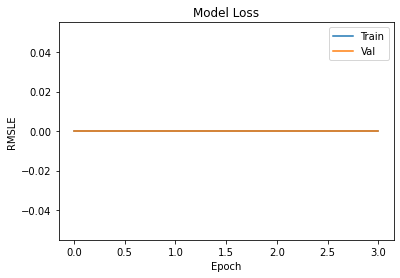

In [ ]:
plot_history(history)

# KERAS CLASSIFIER

In [ ]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(40, input_dim=40, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=2, shuffle=True)
results = cross_val_score(estimator, X_train_preproc, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [28]:
X_train_preproc.shape

(132444, 40)

In [ ]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# larger model
def create_larger():
	# create model
	model = Sequential()
	model.add(Dense(62, input_dim=62, activation='relu'))
	model.add(Dense(30, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
kclass = KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)))

kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(kclass, X_train_preproc, y_train, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# LIGHTGBM Classifier

In [29]:
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = LGBMClassifier()
# fit the model on the whole dataset
model.fit(X_train_preproc, y_train)
# make a single prediction
y_pred = model.predict(X_test_preproc)
#print('Predicted Class: %d' % yhat[0])

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
y_true = y_test
accuracy = round(accuracy_score(y_true, y_pred), 2)
precision = round(precision_score(y_true, y_pred), 2)
recall = round(recall_score(y_true, y_pred), 2)
f1_score = round(f1_score(y_true, y_pred), 2)

print(accuracy)
print(precision)
print(recall)
print(f1_score)

0.69
0.7
0.83
0.76


In [56]:
#feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X_train_preprocb.columns})
preproc.named_steps['columntransformer']

ColumnTransformer(transformers=[('numerical_encoder',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['coco_max_combined', 'cos_day', 'cos_time',
                                  'mean_delay', 'prcp_max_combined', 'sin_day',
                                  'sin_time', 'snow_max_combined',
                                  'temp_max_combined', 'temp_min_combined',
                                  'wpgt_max_combined', 'wspd_max_combined']),
                                ('ordinal_encoder',
                                 Pi...
                                                  OrdinalEncoder(categories=[[1,
                                                                              2,
                                                                              3,
                                                                              4]],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['coco_max_combined']),
                                ('nominal_encoder',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['covid_lockdown', 'public_holiday', 'trip',
                                  'weekday'])])

In [39]:
# explore lightgbm number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
	models = dict()
	trees = [10, 50, 100, 500, 1000, 5000,10000]
	for n in trees:
		models[str(n)] = LGBMClassifier(n_estimators=n)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

,trip,mean_delay,weekday,sin_time,cos_time,sin_day,cos_day,public_holiday,covid_lockdown,temp_max_combined,temp_min_combined,prcp_max_combined,snow_max_combined,wspd_max_combined,wpgt_max_combined,coco_max_combined
3933,Berlin-Köln,20.130588,Wednesday,0.173648,0.984808,0.932655,-0.360771,False,True,21.1,7.3,0.0,0.0,34.2,53.0,2.0
5793,Berlin-Köln,30.206683,Friday,-0.884988,-0.465615,0.204552,-0.978856,False,True,24.6,13.1,2.0,0.0,21.2,37.0,4.0
1585,Berlin-Köln,16.584906,Wednesday,-0.511293,0.859406,-0.579421,0.815028,False,False,8.6,1.4,0.0,0.0,18.7,28.0,2.0
5283,Berlin-Köln,27.937817,Saturday,-0.999229,0.039260,-0.607058,-0.794658,False,False,36.0,18.0,0.0,0.0,10.8,20.4,1.0
4383,Berlin-Köln,17.124260,Tuesday,-0.378649,0.925541,-0.926324,-0.376728,False,False,21.6,12.4,0.0,0.0,16.7,35.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834,Berlin-Köln,20.130588,Wednesday,0.134851,0.990866,0.136906,0.990584,False,False,8.7,1.3,0.2,0.0,18.5,29.6,3.0
6032,Berlin-Köln,30.191011,Tuesday,-0.533615,-0.845728,0.745438,0.666575,False,False,8.9,6.1,0.1,0.0,28.8,55.5,2.0
1564,Berlin-Köln,16.584906,Tuesday,-0.511293,0.859406,-0.839138,0.543919,False,False,12.8,7.6,1.1,0.0,17.3,33.0,3.0
4201,Berlin-Köln,17.124260,Friday,-0.378649,0.925541,0.607058,0.794658,False,False,6.9,-1.6,0.0,0.0,28.8,40.0,2.0


>1 0.618 (0.018)
>2 0.629 (0.018)
>3 0.639 (0.016)
>4 0.643 (0.016)
>5 0.648 (0.017)
>6 0.647 (0.015)
>7 0.649 (0.011)
>8 0.648 (0.017)
>9 0.648 (0.018)
>10 0.644 (0.017)


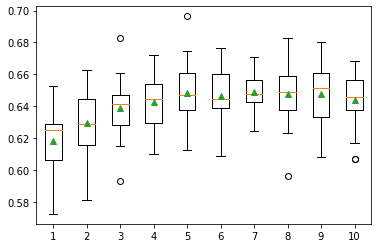

In [14]:

# explore lightgbm tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,11):
		models[str(i)] = LGBMClassifier(max_depth=i, num_leaves=2**i)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train_preproc, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.0001 0.594 (0.001)
>0.0010 0.594 (0.001)
>0.0100 0.637 (0.014)
>0.1000 0.648 (0.018)
>1.0000 0.618 (0.018)


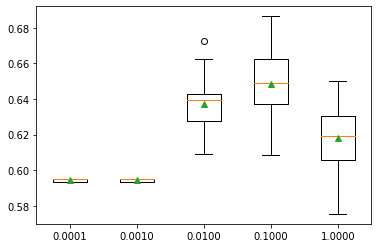

In [16]:
# explore lightgbm learning rate effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from matplotlib import pyplot
  
# get a list of models to evaluate
def get_models():
	models = dict()
	rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
	for r in rates:
		key = '%.4f' % r
		models[key] = LGBMClassifier(learning_rate=r)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train_preproc, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>gbdt 0.648 (0.018)
>dart 0.650 (0.015)
>goss 0.632 (0.016)


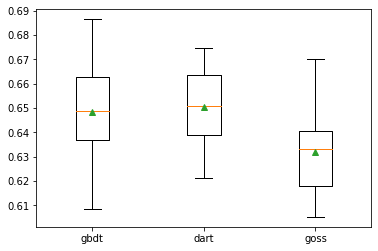

In [17]:
# explore lightgbm boosting type effect on performance
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
	models = dict()
	types = ['gbdt', 'dart', 'goss']
	for t in types:
		models[t] = LGBMClassifier(boosting_type=t)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train_preproc, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1000_0.05_6_dart 0.647 (0.015)
>1000_0.05_6_goss 0.634 (0.023)
>1000_0.1_6_dart 0.647 (0.017)
>1000_0.1_6_goss 0.629 (0.022)
>1000_0.2_6_dart 0.640 (0.021)
>1000_0.2_6_goss 0.623 (0.019)
>1000_0.5_6_dart 0.632 (0.023)
>1000_0.5_6_goss 0.548 (0.028)


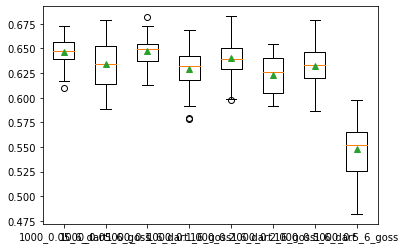

In [59]:

# combine a bunch of these params into one bigger grid search
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
	models = dict()
	trees = [1000]
	types = ['dart', 'goss']
	rates = [0.05, 0.1,0.2,0.5]
	for i in range(6,7):
		for r in rates:
				for t in types:
						for n in trees:
							key = str(n)+'_'+str(r)+'_'+str(i)+'_'+t
							models[key] = LGBMClassifier(n_estimators=n,boosting_type=t,learning_rate=r,max_depth=i, num_leaves=2**i)
			

	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train_preproc, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()



	
	


In [30]:
# Final model with all the best parameters

from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier

# define the model
model = LGBMClassifier(n_estimators=10000,boosting_type='dart',learning_rate=0.1,max_depth=7, num_leaves=2**7)
# fit the model on the whole dataset
model.fit(X_train_preproc, y_train)
# make a single prediction
y_pred = model.predict(X_test_preproc)
#print('Predicted Class: %d' % yhat[0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
y_true = y_test
accuracy = round(accuracy_score(y_true, y_pred), 2)
precision = round(precision_score(y_true, y_pred), 2)
recall = round(recall_score(y_true, y_pred), 2)
f1_score = round(f1_score(y_true, y_pred), 2)

print(accuracy)
print(precision)
print(recall)
print(f1_score)

In [ ]:
X_test_preproc = preproc.transform(X_test)
predictions = model.predict(X_test_preproc)

# SAVING

In [ ]:
from sklearn.pipeline import Pipeline
import joblib

model_name = model

pipeline = Pipeline([
      ('pipeline', create_preproc(X_train)),
      ('model', model_name)
    ])
pipeline.fit(X_train, y_train)

joblib.dump(pipeline, 'model.joblib')

In [28]:
# This is for loading an existing model
from sklearn.pipeline import Pipeline
import joblib
model_api = joblib.load('../data/model.joblib')
print(model_api.predict(X_test)) # X_test here is in the same format as preprocessed data, pipeline is included in the model
print(model_api.predict_proba(X_test))

/home/spupe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator KNNImputer from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/spupe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/spupe/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator Pipeline from version 1.0.2 when using 

AttributeError: 'KNNImputer' object has no attribute '_valid_mask'

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_pred = model_api.predict(X_test)
y_true = y_test
accuracy = round(accuracy_score(y_true, y_pred), 2)
precision = round(precision_score(y_true, y_pred), 2)
recall = round(recall_score(y_true, y_pred), 2)
f1_score = round(f1_score(y_true, y_pred), 2)

print(accuracy)
print(precision)
print(recall)
print(f1_score)
print(classification_report(y_test, y_pred))f